<a href="https://colab.research.google.com/github/gmauricio-toledo/tda/blob/main/notebooks/00-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Clustering</h1>


* El análisis de agrupamiento, o agrupamiento, es una tarea de aprendizaje automático no supervisada.

* Implica descubrir automáticamente la agrupación natural de los datos. A diferencia del aprendizaje supervisado (como el modelado predictivo), los algoritmos de agrupación solo interpretan los datos de entrada y encuentran grupos o agrupaciones naturales en el espacio de características.

* Un cluster es un en el espacio de características donde las instancias están más cerca del grupo que de otros grupos.

* Es probable que estos grupos reflejen algún mecanismo en funcionamiento en el dominio del que se extraen las instancias, un mecanismo que hace que algunas instancias tengan un parecido más fuerte entre sí que con las instancias restantes.

* La agrupación en clústers puede ser útil como actividad de análisis de datos para obtener más información sobre el dominio del problema, el llamado descubrimiento de patrones o descubrimiento de conocimiento.

* El agrupamiento también puede ser útil como un tipo de ingeniería de características, donde los ejemplos existentes y nuevos se pueden mapear y etiquetar como pertenecientes a uno de los grupos identificados en los datos.

* La evaluación de los grupos identificados es subjetiva y puede requerir un experto en el dominio, aunque existen muchas medidas cuantitativas específicas de los grupos.

&#128214; <u>Referencias bibliográficas</u>:
* Flach, Peter (2012). Machine Learning: The Art and Science of Algorithms that Make Sense of Data. Cambridge University Press.

[Algoritmos de clustering en scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)

___

# Ejemplo 0

In [ ]:
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300,
                  n_features=2,
                  centers=3,
                  random_state=3145)

# X, _ = make_moons(n_samples=300,
#                   noise=0.05, random_state=42)

# X, _ = make_circles(n_samples=300,
#                     noise=0.05, random_state=42)

plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

clustering = KMeans(n_clusters=2)
# clustering = AgglomerativeClustering(n_clusters=2)
# clutering = DBSCAN(eps=0.13, min_samples=10)

clustering.fit(X)
clusters = clustering.labels_

silueta = silhouette_score(X,clusters)
print(f"Silueta: {silueta}")

plt.figure()
plt.scatter(X[:,0],X[:,1],c=clusters)
plt.show()

Para el punto de datos $i \in C_i$, se denota por $a(i)$, la distancia promedio de $i$ a todos los demás puntos en ese clúster:

$$
a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, \, i \neq j} d(i, j)
$$

donde $|C_i|$ es el número de puntos que pertenecen al clúster $C_i$, y $d(i,j)$ es la distancia entre los puntos de datos $ i$ y $j$ en el clúster $C_i$. $a(i)$ puede interpretarse como una medida de qué tan bien está asignado $i$ a su clúster (cuanto menor sea el valor, mejor será la asignación).

Luego, definimos la disimilitud media del punto $i$ a algún clúster $C_j$ como la media de la distancia de $i$ a todos los puntos en $C_j$ (donde $C_j \neq C_i$).

Para cada punto de datos $i \in C_i$, definimos $b(i)$ como la distancia promedio entre $i$ y los puntos del clúster más cercano (de ahí el "min") al que $i$ no pertenece:

$$b(i) = \min_{j \neq i} \frac{1}{|C_j|} \sum_{l \in C_j} d(i, l)$$

El clúster con la menor disimilitud media se considera el "clúster vecino" de $i$, ya que es el siguiente mejor ajuste para el punto $i$.

Finalmente, definimos el valor de la ''silueta'' para un punto de datos $i$:

$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}, \quad \text{si } |C_i| > 1$$


In [ ]:
nums_clusters = range(2,10)
siluetas = []

for k in nums_clusters:
    clustering = KMeans(n_clusters=k)
    clustering.fit(X)
    clusters = clustering.labels_
    silueta = silhouette_score(X,clusters)
    siluetas.append(silueta)

plt.figure()
plt.plot(nums_clusters,siluetas)
plt.scatter(nums_clusters,siluetas)
plt.xlabel("Número de clusters")
plt.ylabel("Silueta")
plt.show()

# Ejemplo 1: Documentos de Wikipedia

Usaremos otra vez el dataset de documentos de Wikipedia, tomaremos la versión parcial y preprocesada de la sesión pasada.

El objetivo de la práctica es hacer **Topic Modelling**, es decir segmentar los documentos en grupos con temáticas similares. Para esto, usaremos algoritmos de clustering aplicados a representaciones vectoriales de los documentos. Si las representaciones vectoriales de los documentos son *buenas*, lograremos este objetivo.

Al final evaluaremos usamos métricas de clustering y visualizando tópicos manualmente

**El dataset no tiene una variable target** Estamos en aprendizaje no supervisado

In [22]:
!gdown 1GZeXRqaOTf9zQg8GIJMuGTtnkRLicLug
!gdown 1kvdbFQF9G1LTmcTVEPPy57nJRTuT2Kkt
!gdown 1x-cchU5867nLouPWjBHOLhfW1w1f0Uq0

Downloading...
From: https://drive.google.com/uc?id=1GZeXRqaOTf9zQg8GIJMuGTtnkRLicLug
To: /content/wikipedia_batch_001_embeddings.npy
100% 15.4M/15.4M [00:00<00:00, 82.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1kvdbFQF9G1LTmcTVEPPy57nJRTuT2Kkt
From (redirected): https://drive.google.com/uc?id=1kvdbFQF9G1LTmcTVEPPy57nJRTuT2Kkt&confirm=t&uuid=609903e0-f1e3-48d7-be4c-cf361e27b5b4
To: /content/wikipedia_batch_001_cleantext.csv
100% 258M/258M [00:02<00:00, 113MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1x-cchU5867nLouPWjBHOLhfW1w1f0Uq0
From (redirected): https://drive.google.com/uc?id=1x-cchU5867nLouPWjBHOLhfW1w1f0Uq0&confirm=t&uuid=8a9373c7-09a2-40ca-8824-ded4298cf332
To: /content/Wikipedia_MiniLM_kmeans_6.html
100% 130M/130M [00:00<00:00, 1.06GB/s]


In [23]:
import pandas as pd
import numpy as np

fname = "wikipedia_batch_001_cleantext.csv"
df = pd.read_csv(fname)
df

,text,clean text
0,}} }} }} }} }} }} }} Wikipedia dispone varios...,Wikipedia dispone varios proyectos internos pa...
1,|latín: « virtud más fuerte unida») |catalán:...,latín « virtud más fuerte unida») catalán « Gr...
2,|15px|right|Escudo ciudad Buenos Aires |15p...,15px right Escudo ciudad Buenos Aires 15px rig...
3,"|país 1 = España |frontera país 1 = 63,7 |paí...","país 1 España frontera país 1 63,7 país 2 Fran..."
4,"|edad_0-14_años = 13,87% |edad_15-64_años = 72...","edad_0-14_años 13,87% edad_15-64_años 72,54% A..."
...,...,...
9995,Puntero tiene diferentes acepciones según con...,Puntero tiene diferentes acepciones según cont...
9996,} |más info = [ Ficha seguridad ICSC 0405] }}...,más info [ Ficha seguridad ICSC 0405] cafeína ...
9997,"ámbito química orgánica, las aminas son comp...","ámbito química orgánica, las aminas son compue..."
9998,Una las motivaciones detrás creación Solit...,Una las motivaciones detrás creación Solitaire...


In [24]:
import numpy as np

X = np.load("wikipedia_batch_001_embeddings.npy")

random_idxs = np.random.choice(X.shape[0],size=2000,replace=False)
X = X[random_idxs]

X.shape

(2000, 384)

Hacemos reducción de dimensionalidad

In [25]:
from sklearn.decomposition import PCA

docs_list = df['clean text'].values

pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(2000, 384)


Hacemos clustering a las representaciones vectoriales.

In [33]:
from sklearn.cluster import KMeans

num_clusters = 8
# num_clusters = 6

clustering = KMeans(n_clusters=num_clusters)
clustering.fit(X)
clusters = clustering.labels_

In [34]:
idxs_per_cluster = {j:np.where(clusters==j)[0] for j in np.unique(clusters)}
documents_per_cluster = {j:docs_list[idxs_per_cluster[j]] for j in np.unique(clusters)}

Con la finalidad de explorar el contenido de los textos de cada cluster, hacemos una nube de palabras de los documentos de cada cluster. Para esto, usamos el módulo [wordcloud](https://pypi.org/project/wordcloud/).

Aquí puedes ver [ejemplos de su uso](https://github.com/amueller/word_cloud/tree/main)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


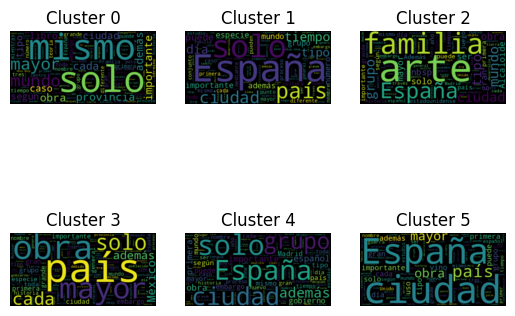

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk import word_tokenize

lista_sw = list(stopwords.words('spanish'))
lista_sw.extend(['forma','dos','parte','año','así','sistema','ejemplo','aunque'])

fig, axs = plt.subplots(nrows=2,ncols=3,dpi=100)

axs = axs.flatten()  # Convierte el array 2D en 1D
for k,ax in enumerate(axs):
    tok_texts = [word_tokenize(doc) for doc in documents_per_cluster[k]]
    texts = [" ".join([x for x in doc if x.lower() not in lista_sw]) for doc in tok_texts]
    wordcloud = WordCloud().generate(" ".join(texts))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"Cluster {k}")
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(f"Score de silueta: {silhouette_score(X,clusters)}")

Visualicemos el valor de codo

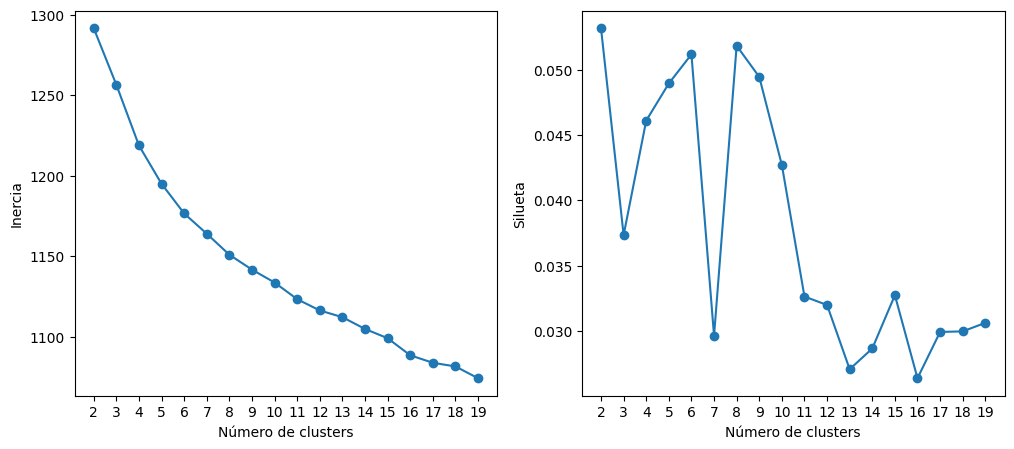

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

n_clusters = range(2,20)
inercias = []
siluetas = []

for k in n_clusters:
    clustering = KMeans(n_clusters=k)
    clustering.fit(X)
    inercias.append(clustering.inertia_)
    clusters = clustering.labels_
    silueta = silhouette_score(X,clusters)
    siluetas.append(silueta)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(n_clusters,inercias)
plt.scatter(n_clusters,inercias)
plt.xlabel("Número de clusters")
plt.xticks(n_clusters)
plt.ylabel("Inercia")
plt.subplot(1,2,2)
plt.plot(n_clusters,siluetas)
plt.scatter(n_clusters,siluetas)
plt.xlabel("Número de clusters")
plt.xticks(n_clusters)
plt.ylabel("Silueta")
plt.show()

Imprimamos algunos documentos de cada cluster:

In [ ]:
for j,docs in enumerate(documents_per_cluster.values()):
    print(f"Cluster {j}:")
    for doc in docs[:4]:
        print(f"\t{doc[:100]}")
    print()

🔵 Reflexiona sobre las siguientes preguntas:

* ¿Puedes ver de qué tratan los documentos de cada cluster?
* Prueba a cambiar el número de clusters.
* Prueba a cambiar el número de dimensiones de las representaciones vectoriales.
* Prueba a cambiar el método de clustering
* En cada tarea de clustering, mide el coeficiente de silueta.

# Ejemplo 2: Canciones de Spotify

Este conjunto de datos contiene estadísticas de audio de las 2.000 canciones top de Spotify. Los datos contienen alrededor de 15 columnas que describen la canción y algunas de sus cualidades. Se incluyen canciones publicadas desde 1956 hasta 2019 de algunos artistas notables y famosos. Estos datos contienen características de audio como Danceability, BPM, Liveness, Valence(Positivity) y algunas más:

* Índice: ID
* Título: Nombre de la pista
* Artista: Nombre del artista
* Género superior: Género de la pista
* Año: Año de lanzamiento de la pista
* Pulsaciones por minuto (BPM): El tempo de la canción
* Energy: La energía de una canción: cuanto más alto sea el valor, más energética será la canción.
* Danceability: Cuanto más alto sea el valor, más fácil será bailar esta canción.
* Loudness: Cuanto más alto sea el valor, más fuerte será la canción.
* Liveness: ...
* Valence: Cuanto más alto sea el valor, más positivo será el estado de ánimo de la canción.
* Duración: La duración de la canción.
* Acousticness: Cuanto más alto sea el valor, más acústica será la canción.
* Speechiness: Cuanto más alto sea el valor, más palabras habladas contiene la canción.
* Popularity: Cuanto más alto sea el valor, más popular es la canción.

Este dataset se encuentra en [Kaggle](https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset)

Vamos a hacer clustering como estrategia para agrupar canciones por grupos similares con base en sus features numéricas.

**El dataset no tiene una variable target** Estamos en aprendizaje no supervisado

In [ ]:
import pandas as pd
import numpy as np

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/spotify-2000.csv'
df = pd.read_csv(url,index_col=0,thousands=',')
df

Hagamos un breve analisis exploratorio

In [ ]:
df.dtypes

Veamos los géneros

In [ ]:
generos = df['Top Genre'].unique()
print(f"Hay {len(generos)} géneros únicos:")
print(generos)

Veamos los rangos de las variables

In [ ]:
df.describe()

A manera de análisis exploratorio, veamos las correlaciones entre variables, ¿qué observamos?

In [ ]:
from seaborn import heatmap
import matplotlib.pyplot as plt

correlaciones = df.iloc[:,3:].corr()
heatmap(correlaciones)
plt.show()

Dado que algunos métodos de clustering son susceptibles a la escala de valores, hacemos un escalamiento de las variables numéricas.

**Haremos clustering con sólo estas variables numéricas**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


df2 = df[["Beats Per Minute (BPM)", "Loudness (dB)",
              "Liveness", "Valence", "Acousticness",
              "Speechiness"]].copy()

scaler = MinMaxScaler()
df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
X = df2.values

df2.head(3)

In [ ]:
df2.describe()

Usamos K-means para segmentar en 10 grupos

In [ ]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=10, n_init='auto')

modelo.fit(X)
clusters = modelo.labels_

print(f"Las primeras 10 etiquetas: {clusters[:10]}")

Integramos la información de los clusters al dataframe original.

In [ ]:
df["Music Segments"] = clusters
df["Music Segments"] = df["Music Segments"].map({0: "Cluster 1", 1:
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5",
    5: "Cluster 6", 6: "Cluster 7", 7: "Cluster 8",
    8: "Cluster 9", 9: "Cluster 10"})
df.head(5)

Observemos un cluster

In [ ]:
cluster = 'Cluster 1'

df[df['Music Segments']==cluster][['Artist','Title','Top Genre','Year']]

Podemos ver los artistas en este cluster

In [ ]:
df[df['Music Segments']==cluster]['Artist'].unique()

Graficamos usando solamente 3 features. Usamos el módulo [plotly](https://plotly.com/python/) para gráficas interactivas.

Otra alternativa es [Bokeh](https://bokeh.org/).

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for i in list(df["Music Segments"].unique()):
    PLOT.add_trace(go.Scatter3d(x = df[df["Music Segments"]==i]['Beats Per Minute (BPM)'],
                                    y = df[df["Music Segments"] ==i]['Energy'],
                                    z = df[df["Music Segments"] ==i]['Danceability'],
                                    mode = 'markers',marker_size = 6, marker_line_width = 1,
                                    name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Arial", color  = 'black', size = 12))

PLOT.show()

Usando sólo dos dimensiones:

In [ ]:
plt.figure(dpi=120)
for segment in df["Music Segments"].unique():
    plt.scatter(x = df[df["Music Segments"]==segment]['Beats Per Minute (BPM)'],
                y = df[df["Music Segments"] ==segment]['Energy'])
plt.show()

In [ ]:
plt.figure(dpi=120)
for segment in df["Music Segments"].unique():
    plt.scatter(x = df[df["Music Segments"]==segment]['Danceability'],
                y = df[df["Music Segments"] ==segment]['Energy'])
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(f"Score de silueta: {silhouette_score(X,clusters)}")

⭕ Preguntas:
* Siendo K-Means, ¿por qué se no se ve la separación perfecta?

⭕ Ejercicio 1. Continuando con este método de K-Means:
* ¿Qué valor de K es mejor? Puedes usar cualquiera de los 3 criteros de arriba, empezando por el *elbow value*.
* Una vez que hayas escogido un valor para $K$, reportar los valores de las métricas de clustering: score de Silueta, [Calinski-Harabasz Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score) y [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score).

⭕ Ejercicio 2:

* Repetir el experimento, ahora usando Agglomerative Clustering y DBSCAN.
* ¿Puedes elevar las métricas de clustering? Considera las métricas score de Silueta y [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score).
* Explora visualmente algunas canciones de los clusters, ¿tiene sentido el agrupamiento?

# Ejemplo 3: Segmentación de clientes

l objetivo de este análisis es segmentar a los clientes de un centro comercial en grupos homogéneos (clusters) basados en su comportamiento y características demográficas, como:

* Género
* Ingreso anual (Annual Income (k$)).
* Gasto en el centro comercial (Spending Score (1-100)).
* Edad (Age).

Esto permitirá identificar patrones ocultos y diseñar estrategias de marketing personalizadas para cada grupo (ej: ofertas para "clientes de alto ingreso pero bajo gasto").

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03%20Machine%20Learning/data/Mall_Customers.csv"

mall_df = pd.read_csv(url)
mall_df.drop(columns=['CustomerID'],inplace=True)
original_mall_df = mall_df.copy()
mall_df

🔴 Haz *one-hot encoding* con la variable categórica usando el método `get_dummies`, no olvides el hiperparámetro `drop_first=True`.

In [ ]:
mall_df = pd.get_dummies(mall_df,drop_first=True, dtype=int)
mall_df

🔴 Extrae las variables (features) de cada instancia y define la matrix $X$

In [ ]:
import numpy as np

X = mall_df.values
X.shape

🔴 **Opcional** Aplica reescalamiento a `X`

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

🔴 Clusteriza las instancias, usa K-Means y prueba con dos valores de tu elección para el número de clusters

In [ ]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=4)
clustering.fit(X)

🔴 Extrae los clusters (es decir, el arreglo que dice a qué cluster pertenece cada instancia) con el atributo `labels_`

In [ ]:
import numpy as np

clusters = clustering.labels_

🔴 Evalua el clustering usando la métrica silueta.

**Recuerda que esta métrica es un número $-1\leq s\leq 1$** y entre más alto es mejor.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X,clusters)

🟢 Visualicemos los resultados. Dado que no son tantos ejemplos, imprimamos un dataframe mostrando cada uno de los clusters.

¿Cómo etiquetarias a cada cluster? Es decir, ¿qué comparten en común cada cluster?

In [ ]:
import numpy as np

num_clusters = np.unique(clusters).shape[0]

for i in range(num_clusters):
    print(f"Cluster {i}")
    display(original_mall_df[clusters==i])

*🔴* **Extra**: Hacer reducción de dimensionalidad usando PCA a dos dimensiones y graficar todas las instancias coloreadas por cluster

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
clusetrs = clustering.labels_

plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1],c=clusters)
plt.show()

In [ ]:
import numpy as np

idxs = np.random.choice(X.shape[1],size=2,replace=False)
i, j = idxs[0], idxs[1]

plt.figure()
plt.scatter(X[:,i],X[:,j],c=clusters)
plt.xlabel(mall_df.columns[i])
plt.ylabel(mall_df.columns[j])
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=clusters)
plt.show()